## Logistic/Softmax Regression
A simple multi-event classifier model to predict activity type.

Resources: 
- https://www.skytowner.com/explore/comprehensive_guide_on_logistic_regression

1. Load data

In [20]:
from pathlib import Path
import polars as pl

from lisa.config import PROCESSED_DATA_DIR

input_path: Path = PROCESSED_DATA_DIR / "pilot_data.csv"

df = pl.read_csv(input_path)

df

TRIAL,TIME,first_Electric Potential.1,last_Electric Potential.1,max_Electric Potential.1,min_Electric Potential.1,mean_Electric Potential.1,std_Electric Potential.1,first_D4_Global Angle_r,last_D4_Global Angle_r,max_D4_Global Angle_r,min_D4_Global Angle_r,mean_D4_Global Angle_r,std_D4_Global Angle_r,first_D4_Global Angle_theta,last_D4_Global Angle_theta,max_D4_Global Angle_theta,min_D4_Global Angle_theta,mean_D4_Global Angle_theta,std_D4_Global Angle_theta,first_D4_Global Angle_phi,last_D4_Global Angle_phi,max_D4_Global Angle_phi,min_D4_Global Angle_phi,mean_D4_Global Angle_phi,std_D4_Global Angle_phi,first_D2_accel_r,last_D2_accel_r,max_D2_accel_r,min_D2_accel_r,mean_D2_accel_r,std_D2_accel_r,first_D2_accel_theta,last_D2_accel_theta,max_D2_accel_theta,min_D2_accel_theta,mean_D2_accel_theta,…,first_D2_gyro_r,last_D2_gyro_r,max_D2_gyro_r,min_D2_gyro_r,mean_D2_gyro_r,std_D2_gyro_r,first_D2_gyro_theta,last_D2_gyro_theta,max_D2_gyro_theta,min_D2_gyro_theta,mean_D2_gyro_theta,std_D2_gyro_theta,first_D2_gyro_phi,last_D2_gyro_phi,max_D2_gyro_phi,min_D2_gyro_phi,mean_D2_gyro_phi,std_D2_gyro_phi,first_D6_accel_r,last_D6_accel_r,max_D6_accel_r,min_D6_accel_r,mean_D6_accel_r,std_D6_accel_r,first_D6_accel_theta,last_D6_accel_theta,max_D6_accel_theta,min_D6_accel_theta,mean_D6_accel_theta,std_D6_accel_theta,first_D6_accel_phi,last_D6_accel_phi,max_D6_accel_phi,min_D6_accel_phi,mean_D6_accel_phi,std_D6_accel_phi,ACTIVITY
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
0,299,3.131464,0.297907,3.785151,0.27746,2.581347,1.445571,1.758207,1.785614,1.822728,1.758207,1.798253,0.014787,1.886214,1.785113,1.92784,1.785113,1.883992,0.036389,-1.597638,-1.699084,-1.597638,-1.699084,-1.660581,0.025131,10.371984,2.986388,27.492021,2.986388,15.579405,5.452407,1.756059,0.744771,1.867762,0.117004,1.623773,…,1.808124,2.160571,4.791698,1.790176,3.023787,0.969899,2.266773,0.187495,3.136815,0.07351,2.511667,0.69469,2.876788,-0.820653,3.12584,-3.129758,0.053107,2.561635,7.646303,10.839027,22.015457,7.646303,12.39766,3.314373,1.419928,1.242362,1.56056,0.864398,1.187191,0.193811,-0.105026,-0.351096,0.498378,-0.378075,-0.012815,0.231901,"""walk"""
0,300,3.130854,0.290278,3.785151,0.27746,2.571877,1.45125,1.759439,1.785536,1.822728,1.759439,1.798344,0.014623,1.8859,1.784211,1.92784,1.784211,1.883652,0.036842,-1.597835,-1.699808,-1.597835,-1.699808,-1.660922,0.024967,10.423297,2.957821,27.492021,2.957821,15.554691,5.492743,1.747525,0.854677,1.867762,0.117004,1.620768,…,1.805661,2.226317,4.791698,1.790176,3.02518,0.968446,2.27567,0.247965,3.136815,0.07351,2.504938,0.706743,2.878706,-0.730932,3.12584,-3.129758,0.041081,2.556799,7.660519,10.787215,22.015457,7.660519,12.40813,3.304259,1.422675,1.243843,1.56056,0.864398,1.186604,0.19337,-0.107234,-0.362227,0.498378,-0.378075,-0.013673,0.232717,"""walk"""
0,301,3.118952,0.283259,3.785151,0.27746,2.562385,1.456884,1.760671,1.785458,1.822728,1.760671,1.798431,0.014468,1.885585,1.783309,1.92784,1.783309,1.88331,0.037295,-1.598032,-1.700532,-1.598032,-1.700532,-1.661264,0.024803,10.47656,2.966363,27.492021,2.957821,15.529835,5.532769,1.739055,0.965584,1.867762,0.117004,1.618162,…,1.803346,2.300491,4.791698,1.790176,3.02683,0.966782,2.284588,0.305833,3.136815,0.07351,2.498371,0.717942,2.880658,-0.678811,3.12584,-3.129758,0.029223,2.551839,7.674829,10.736636,22.015457,7.674829,12.418383,3.294235,1.425413,1.245377,1.56056,0.864398,1.186013,0.192917,-0.109432,-0.373453,0.498378,-0.378075,-0.01456,0.233581,"""walk"""
0,302,3.168391,0.284785,3.785151,0.27746,2.552937,1.462441,1.761903,1.785382,1.822728,1.761903,1.798513,0.014321,1.885271,1.782407,1.92784,1.782407,1.882966,0.037747,-1.598229,-1.701256,-1.598229,-1.701256,-1.661608,0.024638,10.531744,3.011698,27.492021,2.957821,15.504952,5

In [21]:
df['ACTIVITY'].value_counts()

ACTIVITY,count
str,u32
"""jog""",118799
"""run""",9701
"""jump""",14103
"""walk""",474917


2. Train/Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.select(pl.exclude(["ACTIVITY","TRIAL", "TIME"])), df.select('ACTIVITY'), test_size=0.2, random_state=42
)

3. Feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(multi_class="ovr")

In [25]:
logisticRegr.fit(X_train, y_train)

/Users/tomwilson/micromamba/envs/LISA/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tomwilson/micromamba/envs/LISA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [26]:
predictions = logisticRegr.predict(X_test)

5. Measure performance

In [27]:
score = logisticRegr.score(X_test, y_test)
print(score)

1.0


Text(0.5, 1.0, 'Accuracy Score: 1.0')

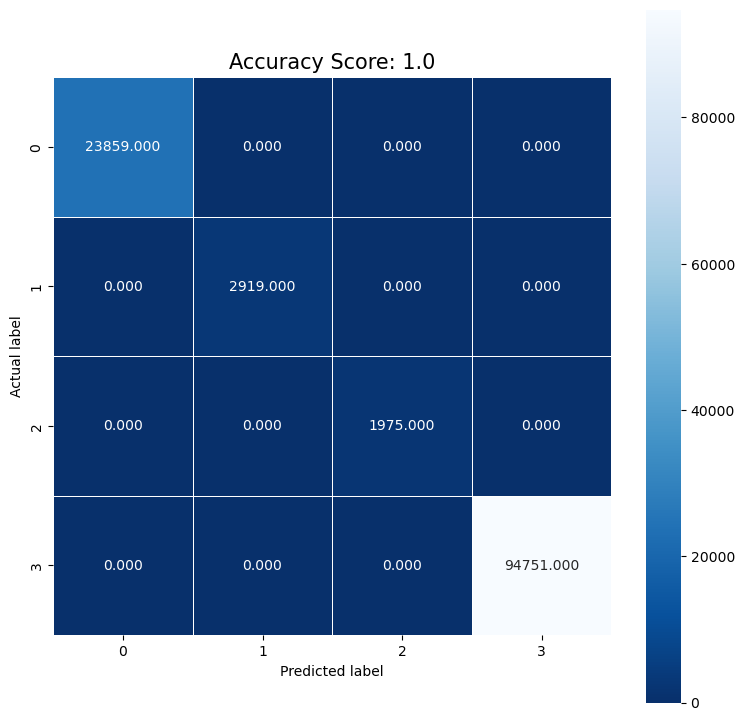

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {score}'
plt.title(all_sample_title, size = 15)

In [29]:
import numpy as np
# Coefficients and Odds Ratios
coefficients = logisticRegr.coef_[0]
odds_ratios = np.exp(coefficients)


# Display feature importance using coefficients and odds ratios
feature_importance = pl.DataFrame({
    'Feature': df.select(pl.exclude(["ACTIVITY","TRIAL", "TIME"])).columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort(by='Coefficient', descending=True))


Feature Importance (Coefficient and Odds Ratio):
shape: (636, 3)
┌───────────────────────────┬─────────────┬────────────┐
│ Feature                   ┆ Coefficient ┆ Odds Ratio │
│ ---                       ┆ ---         ┆ ---        │
│ str                       ┆ f64         ┆ f64        │
╞═══════════════════════════╪═════════════╪════════════╡
│ mean_D7_Global Angle_phi  ┆ 1.507038    ┆ 4.51334    │
│ max_D7_Global Angle_phi   ┆ 1.50175     ┆ 4.48954    │
│ first_D7_Global Angle_phi ┆ 1.281488    ┆ 3.601995   │
│ last_D7_Global Angle_phi  ┆ 1.2578      ┆ 3.517675   │
│ std_D7_Global Angle_phi   ┆ 1.155578    ┆ 3.175858   │
│ …                         ┆ …           ┆ …          │
│ last_D6_Global Angle_r    ┆ -0.669137   ┆ 0.51215    │
│ mean_D1_accel_theta       ┆ -0.678809   ┆ 0.507221   │
│ mean_D6_Global Angle_r    ┆ -0.681457   ┆ 0.505879   │
│ std_D3_Global Angle_r     ┆ -0.752379   ┆ 0.471244   │
│ min_Electric Potential.1  ┆ -0.817574   ┆ 0.441501   │
└─────────────────────

In [30]:
from sklearn.inspection import permutation_importance

# Permutation Importance
perm_importance = permutation_importance(logisticRegr, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_df = pl.DataFrame({
    'Feature': df.select(pl.exclude(["ACTIVITY","TRIAL", "TIME"])).columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

print("\nPermutation Importance:")
print(perm_importance_df.sort(by='Importance Mean', descending=True))


python(38022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38042) Malloc

KeyboardInterrupt: 